In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


C:\Users\sailesh\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('forestfires.csv')
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [3]:
df.shape

(517, 13)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
X,517.0,4.669246,2.313778,1.0,3.0,4.00,7.00,9.00
Y,517.0,4.299807,1.229900,2.0,4.0,4.00,5.00,9.00
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40


In [5]:
df.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [6]:
df.isna().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [7]:
df1 = df.drop('area',axis=1)
df1.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0


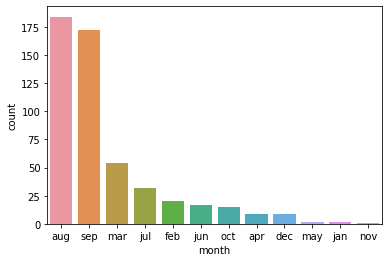

In [8]:

sns.countplot(x=df['month'],data=df, order=df['month'].value_counts().index)

## High number of the forest fires occur in the month of August and September.

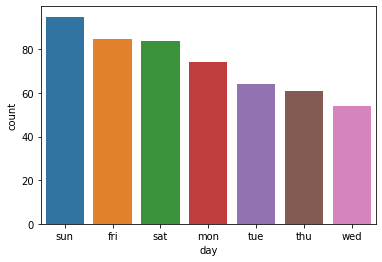

In [9]:
sns.countplot(x=df['day'],data=df,order=df['day'].value_counts().index)

## In the case of day, the days Friday to Monday have higher proportion of cases. (However, no strong indicators)

In [10]:
import plotly.graph_objects as go

# Wind by month

In [24]:
fig = go.Figure(data=go.Histogram2dContour(x=df['month'],y=df['wind']))
fig.show()

# Rainfall by month

In [27]:
fig = go.Figure(data=go.Histogram2dContour(x=df['month'],y=df['rain'],colorscale='Blues'))
fig.show()

In [13]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
columns = df.columns.values
for col in columns:
    if df[col].dtypes != np.int64 and df[col].dtypes != np.float64:
        print(col)
        LE.fit(df[col].astype(str))
        df[col] = LE.transform(df[col].astype(str))

df.head()

month
day


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [14]:
from sklearn.preprocessing import StandardScaler

X = df.values[:,:-1]
cluster_dataset = StandardScaler().fit_transform(X)

num_cluster = 3
k_means = KMeans(init='k-means++',n_clusters=num_cluster,n_init=12)
k_means.fit(cluster_dataset)
labels=k_means.labels_
cluster_centers = k_means.cluster_centers_

In [15]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [16]:
df['labels'] = labels
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,labels
0,7,5,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,7,4,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0
2,7,4,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0
3,8,6,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,8,6,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


In [17]:
df.groupby('labels').mean()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
labels,,,,,,,,,,,,,
0,4.500000,4.152632,10.768421,2.447368,91.543684,114.208947,723.064737,8.502632,19.516316,42.321053,3.505263,0.000000,16.734947
1,4.811966,4.461538,5.034188,2.230769,85.690598,34.770940,145.888034,5.588034,12.326496,47.581197,4.834188,0.001709,6.185897
2,4.742857,4.342857,1.628571,3.280952,92.591429,150.252857,613.494286,11.404286,21.978095,44.233333,4.026190,0.052381,13.041238


In [18]:
df.groupby('labels').sum()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
labels,,,,,,,,,,,,,
0,855,789,2046,465,17393.3,21699.7,137382.3,1615.5,3708.1,8041,666.0,0.0,3179.64
1,563,522,589,261,10025.8,4068.2,17068.9,653.8,1442.2,5567,565.6,0.2,723.75
2,996,912,342,689,19444.2,31553.1,128833.8,2394.9,4615.4,9289,845.5,11.0,2738.66


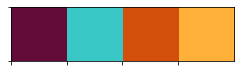

In [19]:
#define a custom palette
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
sns.set_palette(customPalette)
sns.palplot(customPalette)

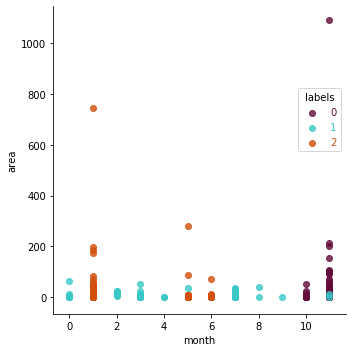

In [20]:
#plot data with seaborn (don't add a legend yet)
facet = sns.lmplot(data=df, x='month', y='area', hue='labels', 
                   fit_reg=False, legend=False)

#add a legend
leg = facet.ax.legend(bbox_to_anchor=[1, 0.75],
                         title="labels", fancybox=True)
#change colors of labels
for i, text in enumerate(leg.get_texts()):
    plt.setp(text, color = customPalette[i])